<a href="https://colab.research.google.com/github/suraj-iitb/BERT-Models/blob/master/Inspect_BERT_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Model


Install the huggingface implementation.

In [1]:
!pip install pytorch-pretrained-bert

     |████████████████████████████████| 133kB 1.4MB/s 


In [2]:
import torch
from pytorch_pretrained_bert import BertTokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 319319.11B/s]


## Inspect BERT Vocabulary
--------------------------

### Vocab Dump
--------------

Retrieve the entire list of "tokens" and write these out to text files so we can peruse them.

In [0]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')


From perusing the vocab, I'm seeing that:

* The first 999 tokens (1-indexed) appear to be reserved, and most are of the form [unused957].
    * 1   - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.
    * The last whole word is at 29612, "necessitated"

Some funny inclusions:
* starbucks
* triassic
* abolitionist
* 1679

### Single Characters
---------------------

The following code prints out all of the single character tokens in vocabulary, as well as all of the single-character tokens preceded by '##'.

It turns out that these are matching sets--for every standalone character there is also a '##' version. There are 997 single character tokens.

The following cell iterates over the vocabulary, pulling out all of the single character tokens.

In [0]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)


In [5]:
print('Number of single character tokens:', len(one_chars), '\n')

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ

In [6]:
print('Number of single character tokens with hashes:', len(one_chars_hashes), '\n')

# Print all of the single characters, 40 per row.

# Strip the hash marks, since they just clutter the display.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# For every batch of 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(tokens) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 997 

s a e i n o d r y t l m u h k c g p 2 z 1 b 3 f 4 6 7 x v 8 5 9 0 w j q ° ₂ а и
² ₃ ı ₁ ⁺ ½ о ه ي α е د ن ν ø р ₄ ₀ ر я ³ ι ł н ᵢ ₙ ß ة ς م − т ː ل ь к ♭ η ی в
ا × ¹ ы ה ɛ л ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡
¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ± ´ µ ¶ · º » ¼ ¾ ¿ æ ð ÷ þ đ ħ ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ˡ ˢ ˣ ˤ β γ δ ε ζ
θ κ λ μ ξ ο π ρ σ τ υ φ χ ψ ω б г д ж з м п с у ф х ц ч ш щ ъ э ю ђ є і ј љ њ ћ
ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ ք ־ א ב ג ד ו ז ח ט י ך כ ל ם מ ן נ ס
ע ף פ ץ צ ק ר ש ת ، ء ب ت ث ج ح خ ذ ز س ش ص ض ط ظ ع غ ـ ف ق ك و ى ٹ پ چ ک گ ں ھ
ہ ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ
ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப
ம ய ர ல ள வ ா ி ு ே ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད
ན པ བ མ འ ར ལ ས မ ა ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ

In [7]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? True


### Subwords vs. Whole-words
Let's gather some statistics on the vocabulary.



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Maximum token length: 18


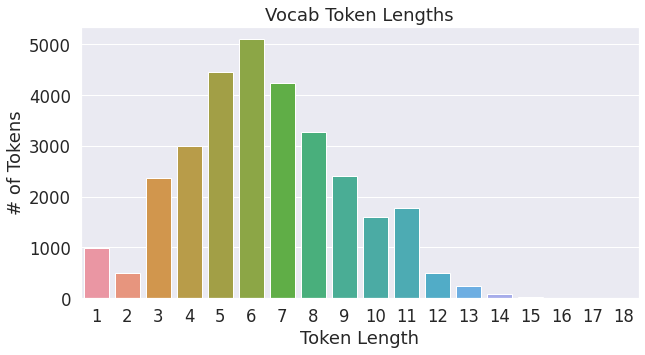

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Let's look at just the tokens which begin with '##'.

In [0]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)


How many '##' tokens are there vs. the full vocab?

In [10]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Number of subwords: 5,828 of 30,522
19.1%


Plot the subword lengths (not including the two '##' characters).

Text(0, 0.5, '# of ## Subwords')

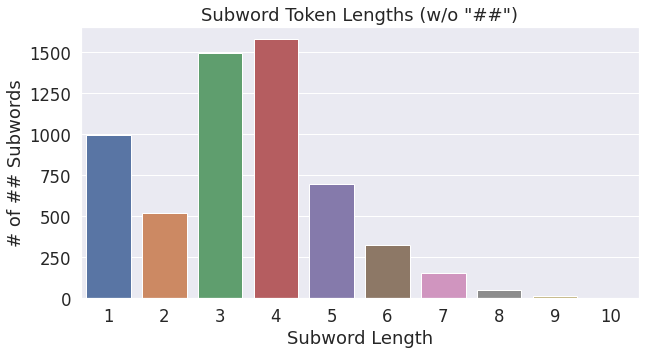

In [11]:
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')

### Misspellings

In [20]:
'misspelled' in tokenizer.vocab # Right

False

In [13]:
'mispelled' in tokenizer.vocab # Wrong

False

In [14]:
'government' in tokenizer.vocab # Right

True

In [15]:
'goverment' in tokenizer.vocab # Wrong

False

In [16]:
'beginning' in tokenizer.vocab # Right

True

In [17]:
'begining' in tokenizer.vocab # Wrong

False

In [18]:
'separate' in tokenizer.vocab # Right

True

In [19]:
'seperate' in tokenizer.vocab # Wrong

False

What about contractions?

In [21]:
"can't" in tokenizer.vocab

False

In [22]:
"cant" in tokenizer.vocab

False

### Start vs. Mid Subwords

For single characters, there are both the individual character and the '##' version for every character. Is the same true of subwords?

In [23]:
# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ly


In [24]:
'##ly' in tokenizer.vocab

True

In [25]:
'ly' in tokenizer.vocab

False

### Names



In [26]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6c5c53a1ae614313aec0ef2f59652a5922543a009960960865608fedc1ce6131
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [27]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names.txt'

In [28]:
# Read them in.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decode the names, convert to lowercase, and strip newlines.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))


Number of names: 21,985
Example: borer


In [29]:
num_names = 0

# For each name in our list...
for name in names:

    # If it's in the vocab...
    if name in tokenizer.vocab:
        # Tally it.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))

3,869 names in the vocabulary


**Further Research**
* Add more modern names
    * This repo / file contains some more modern names. The file download isn't working, though.
    * `https://raw.githubusercontent.com/arineng/arincli/master/lib/male-first-names.txt`
* Add common names from other languages.


### Numbers

In [30]:
# Count how many numbers are in the vocabulary.
count = 0

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():

    # Tally if it's a number.
    if token.isdigit():
        count += 1
        
        # Any numbers >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocab includes {:,} numbers.'.format(count))

Vocab includes 881 numbers.


In [31]:
# Count how many dates between 1600 and 2021 are included.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocab includes {:,} of 421 dates from 1600 - 2021'.format(count))

Vocab includes 384 of 421 dates from 1600 - 2021
